# IMDB Movie Reviews

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn
import os
import zipfile
import seaborn as sns
from time import time

sns.set(style="whitegrid")

In [3]:
os.getcwd()

'C:\\Users\\tshrs\\Documents\\Data Science\\projects\\Text Analytics\\MovieReview'

In [4]:
zf = zipfile.ZipFile('sentiment-analysis-on-movie-reviews.zip') 
print(zf.namelist())

['sampleSubmission.csv', 'train.tsv', 'test.tsv']


In [5]:
df = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0])) 
df_train = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[1]) , sep="\t") 
df_test = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[2])  , sep="\t")  

In [6]:
df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [7]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [8]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [9]:
df_train.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [10]:
df_test.describe()

,PhraseId,SentenceId
count,66292.00000,66292.000000
mean,189206.50000,10114.909144
std,19136.99636,966.787807
min,156061.00000,8545.000000
25%,172633.75000,9266.000000
50%,189206.50000,10086.000000
75%,205779.25000,10941.000000
max,222352.00000,11855.000000


In [11]:
print(df_train.shape)
print(df_test.shape)

(156060, 4)
(66292, 3)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [13]:
Sentiment_count=df_train.groupby('Sentiment').count()
print(Sentiment_count)

           PhraseId  SentenceId  Phrase
Sentiment                              
0              7072        7072    7072
1             27273       27273   27273
2             79582       79582   79582
3             32927       32927   32927
4              9206        9206    9206


[Text(0,0.5,'Number of Reviews'), Text(0.5,0,'Review Sentiments')]

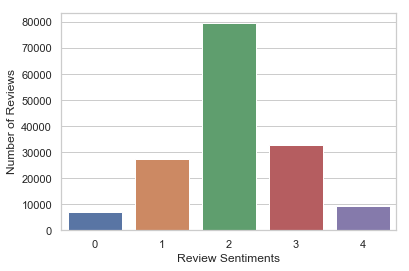

In [14]:

ax = sns.barplot(x=Sentiment_count.index.values, y=Sentiment_count['Phrase'])
ax.set(xlabel='Review Sentiments', ylabel='Number of Reviews')
             

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( stop_words='english' , lowercase=True)
text_counts_train = vectorizer.fit_transform(df_train['Phrase'])
text_counts_test  = vectorizer.transform(df_test['Phrase'])
###
###a. Fit the data i.e. assign all the words in the vectors and assigning indices to each. 
###b. Transform - in vector, assigning values by counting each word. - 
###

ModuleNotFoundError: No module named 'sklearn.feature_extraction.text'

In [ ]:
text_counts_train

In [ ]:
text_counts_test

In [ ]:
print(len(vectorizer.get_feature_names()))

In [ ]:
print(vectorizer.get_feature_names()[1495])

In [ ]:
X_train = text_counts_train

In [ ]:
X_test   = text_counts_test 

In [ ]:
y_train  = df_train['Sentiment']

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

In [ ]:
#create a naive bayes multinomial model

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [ ]:
# train the model with training data set

%time clf.fit(X_train, y_train)

In [ ]:
#predict on test data set with the trained model

y_pred_svc = clf.predict(X_test)
%time clf.predict(X_test)
print(y_pred_svc.shape)

In [ ]:
#calculate accuracy on training data set

acc = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %%\n"%acc)

In [ ]:

#confusion matrix for training data set
from sklearn.metrics import confusion_matrix

clf.fit(X_train, y_train)
y_pred_svc_train = clf.predict(X_train)
acc_training = round(clf.score(X_train, y_train) * 100, 2)
print ("Training Accuracy: %i %%\n"%acc_training)
cnf_matrix = confusion_matrix(y_train, y_pred_svc_train)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['Actual Negative', 'Actual Somewhat Negative' , 'Actual Neutral' , 'Actual Somewhat Positive' , 
                    'Actual Positive']
predicted_class_names = ['Pred Negative', 'Pred Somewhat Negative' , 'Pred Neutral' , ' Pred Somewhat Positive' ,
                         'Pred Positive']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)




In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix,annot = True, fmt='d' , linewidth=0.5  , cbar=False )


**Recall:** True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.
Also called **Sensitivity**

**Precision:** True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.


**True positives** for *Positive* - 3633 i.e. identified(predicted) as *positive* and is(truly) actual *positive*   
**False positives** for *Positive* -  25+80+542+1887 i.e. predicted as *positive* and truly something else   
**False negatives** for *Positive* -  12+112+1243+4206 i.e. NOT predicted as *positive* and truly *positive*   

**True positives** for *Somewhat Negative* - 13154 i.e. identified(predicted) as *Somewhat Negative* and is(truly) actual *Somewhat Negative*    
**False positives** for *Somewhat Negative* -  2665+5365+1076+112 i.e. predicted as *Somewhat Negative* and truly something else   
**False negatives** for *Somewhat Negative* -  1533+11051+1455+80 i.e. NOT predicted as *Somewhat Negative* and truly *Somewhat Negative*   

In [ ]:


#precision for somewhat negative

precision = 13154/(13154 + 2665+5365+1076+112)
print("Precision for Somewhat Negative-calculated manually: ", precision)

#recall for somewhat negative

recall = 13154/(13154 + 1533+11051+1455+80)
print("Recall for Somewhat Negative-calculated manually: ", recall)

## Evaluation metrics

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Negative', 'Somewhat Negative' , 'Neutral' , 'Somewhat Positive' , 
                    'Positive']
print(classification_report(y_train, y_pred_svc_train, target_names=target_names))

In [ ]:

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)
plt.figure(figsize = (15,5))
plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True , cbar=False)

In [ ]:
df_train.groupby('Sentiment').count()

In [ ]:
submission = pd.DataFrame({
        "PhraseId": df_test["PhraseId"],
        "Sentiment": y_pred_svc
    })

In [ ]:
submission.groupby('Sentiment').count()

In [ ]:
#submission

In [ ]:
#write to a csv file

#submission.to_csv('submission.csv', index=False)

## Score is 0.59266 on submission 1
### Let's do some model tuning now

In [37]:
vectorizer = CountVectorizer( stop_words='english' , lowercase=True , ngram_range=(1, 2) , max_df=0.5 ,min_df=2)
text_counts_train = vectorizer.fit_transform(df_train['Phrase'])
text_counts_test  = vectorizer.transform(df_test['Phrase'])

X_train = text_counts_train
X_test   = text_counts_test 
y_train  = df_train['Sentiment']


clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %%\n"%acc)

Accuracy: 70 %



In [38]:
acc = round(clf.score(X_test, y_pred_svc) * 100, 2)
print ("Accuracy: %i %%\n"%acc)

Accuracy: 100 %



In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_pred_svc.shape)


(156060, 70438)
(66292, 70438)
(156060,)
(66292,)


In [40]:
submission2 = pd.DataFrame({
        "PhraseId": df_test["PhraseId"],
        "Sentiment": y_pred_svc
    })
submission2.groupby('Sentiment').count()

,PhraseId
Sentiment,
0,493
1,6579
2,46884
3,11217
4,1119


In [41]:
#submission2.to_csv('submission2.csv', index=False)

## Score is 0.59203 on submission 2
### Let's do some model tuning now

In [42]:
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vectorizer = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts_train = vectorizer.fit_transform(df_train['Phrase'])
text_counts_test  = vectorizer.transform(df_test['Phrase'])

X_train = text_counts_train
X_test   = text_counts_test 
y_train  = df_train['Sentiment']

In [43]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %%\n"%acc)

Accuracy: 66 %



In [44]:
submission3 = pd.DataFrame({
        "PhraseId": df_test["PhraseId"],
        "Sentiment": y_pred_svc
    })
submission3.groupby('Sentiment').count()

,PhraseId
Sentiment,
0,863
1,7910
2,43434
3,12359
4,1726


In [45]:
#submission3.to_csv('submission3.csv', index=False)

## Score is 0.59480 on submission 3
### Let's do some model tuning now

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english' , lowercase=True , ngram_range=(1, 1) ,tokenizer = token.tokenize)
text_tf_train= tf.fit_transform(df_train['Phrase'])
text_tf_test= tf.transform(df_test['Phrase'])

X_train = text_tf_train
X_test   = text_tf_test 
y_train  = df_train['Sentiment']

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(156060, 14988)
(66292, 14988)
(156060,)


In [48]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %%\n"%acc)

Accuracy: 63 %



In [49]:
submission4 = pd.DataFrame({
        "PhraseId": df_test["PhraseId"],
        "Sentiment": y_pred_svc
    })
submission4.groupby('Sentiment').count()

,PhraseId
Sentiment,
0,64
1,4565
2,51842
3,9576
4,245


In [50]:
#submission4.to_csv('submission4.csv', index=False)
#0.58289

## Submission 4 gave score of 0.58289


## Submission 5 processing below...

### 1. Vectorize using Tf-Idf

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tf=TfidfVectorizer(stop_words='english' , lowercase=True , ngram_range=(1, 1) ,tokenizer = token.tokenize)

#fit and transform train data in single step
X_train_dtm= tf.fit_transform(df_train['Phrase'])

X_train_dtm

<156060x14988 sparse matrix of type '<class 'numpy.float64'>'
	with 598944 stored elements in Compressed Sparse Row format>

### 2. Split Training data into train and validation

In [52]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility

from sklearn.model_selection import train_test_split

#data = df_train.drop(['Sentiment'],axis=1)
label = df_train['Sentiment']

X_train, X_val, y_train, y_val = train_test_split(X_train_dtm, label, random_state=1)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(117045, 14988)
(39015, 14988)
(117045,)
(39015,)


### 3. Multinomial Naive Bayes model

In [53]:
nb = MultinomialNB()
t0 = time()

nb.fit(X_train, y_train)

print("training time:", round(time()-t0, 3), "s")

training time: 0.032 s


In [54]:
t1 = time()

y_pred_class = nb.predict(X_val)

print("training time:", round(time()-t1, 3), "s")

training time: 0.005 s


### 4. Accuracy

In [55]:
from sklearn import metrics
metrics.accuracy_score(y_val, y_pred_class)


0.5878251954376522

Confusion Matrix in Numbers
[[   70   730   945    28     1]
 [   42  1887  4775   201     0]
 [   10   934 17551  1352    18]
 [    1   112  4760  3301    70]
 [    0    16   756  1330   125]]



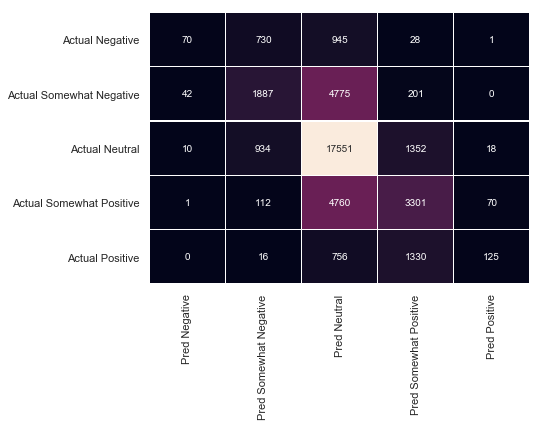

In [56]:

cnf_matrix = confusion_matrix(y_val, y_pred_class)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')



true_class_names = ['Actual Negative', 'Actual Somewhat Negative' , 'Actual Neutral' , 'Actual Somewhat Positive' , 
                    'Actual Positive']
predicted_class_names = ['Pred Negative', 'Pred Somewhat Negative' , 'Pred Neutral' , ' Pred Somewhat Positive' ,
                         'Pred Positive']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (15,5))
plt.subplot(121)
sns.heatmap(df_cnf_matrix,annot = True, fmt='d' , linewidth=0.5  , cbar=False )


In [57]:
target_names = ['Negative', 'Somewhat Negative' , 'Neutral' , 'Somewhat Positive' , 
                    'Positive']
print(classification_report(y_val, y_pred_class, target_names=target_names))

                   precision    recall  f1-score   support

         Negative       0.57      0.04      0.07      1774
Somewhat Negative       0.51      0.27      0.36      6905
          Neutral       0.61      0.88      0.72     19865
Somewhat Positive       0.53      0.40      0.46      8244
         Positive       0.58      0.06      0.10      2227

      avg / total       0.57      0.59      0.54     39015



**Recall:** True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.
Also called **Sensitivity**

**Precision:** True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.


**True positives** for *Positive* - 125 i.e. identified(predicted) as *positive* and is(truly) actual *positive*   
**False positives** for *Positive* -  1+0+18+70 i.e. predicted as *positive* and truly something else   
**False negatives** for *Positive* -  0+16+756+1330 i.e. NOT predicted as *positive* and truly *positive*     

In [58]:
#false negatives

negative =  730+945+28+1
somewhat_negative = 42+4775+201+0
neutral = 10+934+1352+18
somwehat_positive = 1+112+4760+70
postive = 0+16+756+1330

print('###FALSE NEGATIVES###')
print('negative          : ', negative)
print('somewhat negative : ', somewhat_negative)
print('neutral           : ', neutral)
print('somwehat positive : ', somwehat_positive)
print('postive           : ', postive)


###FALSE NEGATIVES###
negative          :  1704
somewhat negative :  5018
neutral           :  2314
somwehat positive :  4943
postive           :  2102


## Technique for model tuning  

### 1. Multiple algos inside a loop  
https://github.com/swapkh91/Finding-Donors-for-CharityML/blob/master/finding_donors.ipynb


In [59]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# TODO: Initialize the three models

clf_A = GradientBoostingClassifier(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = LogisticRegression(random_state=42)
clf_D = MultinomialNB(alpha=1.0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100

samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)/100)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

print('samples_100 : ', samples_100)
print('samples_10  : ', samples_10)
print('samples_1   : ', samples_1)


(117045, 14988)
(39015, 14988)
(117045,)
(39015,)
samples_100 :  117045
samples_10  :  11704
samples_1   :  1170


In [60]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the validation set(X_val),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
        
    #Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_val,predictions_val)
    
    #classification report for precision, relcall, f1-score
    results['f_val'] = classification_report(y_val, predictions_val, target_names=target_names)
               
    # Success
    print("{} trained on {} samples in {} time with prediction time {}.".format(learner.__class__.__name__
                                                                                , sample_size,results['train_time'] 
                                                                                , results['pred_time'] ))
    print()
    print("{} Classification Report ".format(learner.__class__.__name__) )
    print()
    print(results['f_val'] )
    print("******************************************************************************************************************")
        
    # Return the results
    return results

In [61]:
# Collect results on the learners

#for clf in [clf_A,clf_B,clf_C,clf_D]:
#for i, samples in enumerate([samples_1,samples_10,sample_100]):

results = {}
for clf in [clf_A,clf_B,clf_C,clf_D]:
    clf_name = clf.__class__.__name__
#    print('clf_name',clf_name)
    results[clf_name] = {}
#   print('results', results)
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)
        

GradientBoostingClassifier trained on 117045 samples in 80.18649649620056 time with prediction time 0.24136805534362793.

GradientBoostingClassifier Classification Report 

                   precision    recall  f1-score   support

         Negative       0.66      0.08      0.15      1774
Somewhat Negative       0.44      0.05      0.08      6905
          Neutral       0.54      0.98      0.69     19865
Somewhat Positive       0.48      0.09      0.16      8244
         Positive       0.68      0.08      0.14      2227

      avg / total       0.52      0.53      0.41     39015

******************************************************************************************************************
RandomForestClassifier trained on 117045 samples in 234.98274636268616 time with prediction time 3.019584894180298.

RandomForestClassifier Classification Report 

                   precision    recall  f1-score   support

         Negative       0.46      0.38      0.41      1774
Somewhat Nega

### Results of above model 
1. Random classifier gives best f1-score but take almost **244sec**.**f1-score=0.63** 
2. Logistic Regression 2nd highest with a better time of **3.6sec**.**f1-score=0.58**
3. Multnomial NB with best time in **.04 sec**.                     **f1-score 0.54**

## 2. Choose a algo and tune it
## Logistic regression

In [62]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

print('samples_100 : ', samples_100)
print('samples_10  : ', samples_10)
print('samples_1   : ', samples_1)

(117045, 14988)
(39015, 14988)
(117045,)
(39015,)
samples_100 :  117045
samples_10  :  11704
samples_1   :  1170


In [63]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#option1
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

#option2
# param_grid = {'penalty': ['l1','l2'],
#           'solver':['liblinear'],
#           'C': np.logspace(-10,10,21)}

#option3
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,param_grid,cv=5, n_jobs=-1 , verbose=True)

start = time() # Get start time
logreg_cv.fit(X_train,y_train)
end = time() # Get end time

print("Training time {} sec: ". format(end-start))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  3.7min finished


Training time 229.06729340553284 sec: 


In [64]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.6299542910846255


In [65]:
logreg_cv.best_estimator_.get_params()

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Option 1  results are below  
Fitting 5 folds for each of 14 candidates, totalling 70 fits  
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s  
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  3.0min finished  
Training time 189.02651000022888 sec:  
  
tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}  
**best score :** 0.6299542910846255  

#### Option 2  results are below

Fitting 5 folds for each of 42 candidates, totalling 210 fits    
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 18.3min  
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 27.4min finished  
Training time 1649.7961773872375 sec:  

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}  
**best score :** 0.6299542910846255

In [66]:
print('Model accuracy is',logreg_cv.score(X_val, y_val))

Model accuracy is 0.6343457644495707


In [67]:
train_predict(logreg_cv, samples_100, X_train, y_train, X_val, y_val)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  3.0min finished


GridSearchCV trained on 117045 samples in 190.02964043617249 time with prediction time 0.004987478256225586.

GridSearchCV Classification Report 

                   precision    recall  f1-score   support

         Negative       0.52      0.28      0.36      1774
Somewhat Negative       0.52      0.42      0.47      6905
          Neutral       0.70      0.83      0.76     19865
Somewhat Positive       0.56      0.49      0.52      8244
         Positive       0.55      0.34      0.42      2227

      avg / total       0.62      0.63      0.62     39015

******************************************************************************************************************


{'acc_test': 0.6343457644495707,
 'f_val': '                   precision    recall  f1-score   support\n\n         Negative       0.52      0.28      0.36      1774\nSomewhat Negative       0.52      0.42      0.47      6905\n          Neutral       0.70      0.83      0.76     19865\nSomewhat Positive       0.56      0.49      0.52      8244\n         Positive       0.55      0.34      0.42      2227\n\n      avg / total       0.62      0.63      0.62     39015\n',
 'pred_time': 0.004987478256225586,
 'train_time': 190.02964043617249}

## 3. Choose a algo and tune it
## Random Forest Classifier

In [68]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

rf = RandomForestClassifier()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [69]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestClassifier()

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3,
#                                verbose=2, random_state=42, n_jobs = -1)


# start = time() # Get start time
# rf_random.fit(X_train,y_train)
# end = time() # Get end time

# print("Training time {} sec: ". format(end-start))

In [71]:
print("tuned hpyerparameters :(best parameters) ",rf_random.best_params_)
print("accuracy :",rf_random.best_score_)

NameError: name 'rf_random' is not defined

### Datset balance
### Data removal of lower class
### Augmentatiom